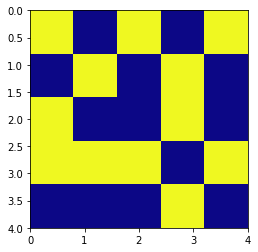

KeyboardInterrupt: 

In [102]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import copy as cp

global L, T, kb, MCS, J

spin_init, E_system, spin_site_numbers, grid_coordinates_x, grid_coordinates_y, grid_spins

L = 5
T = 1
MCS = L**2
J = 1
kb = 1
spin_init = 'random'
 
grid_x, grid_y = [range(L), range(L)]
grid_coordinates_x, grid_coordinates_y = np.meshgrid(grid_x, grid_y) 
grid_coordinates_x, grid_coordinates_y = [np.reshape(grid_coordinates_x,(1,-1)), np.reshape(grid_coordinates_y,(1,-1))]
spin_site_numbers = range(MCS)

grid_spins = assign_spin()

spin_plot = grid_plot(grid_coordinates_x, grid_coordinates_y, grid_spins)
plt.xlabel('y')
plt.ylabel('x')

E_system = system_energy(grid_coordinates_x, grid_coordinates_y, grid_spins)
fig = plt.figure()

# This plotting needs improvement!!
from IPython.display import clear_output
for t in range(100):
    grid_spins, E_system = spin_flip(grid_coordinates_x, grid_coordinates_y, grid_spins, E_system)
    spin_plot = grid_plot(grid_coordinates_x, grid_coordinates_y, grid_spins)
    plt.show(spin_plot)
    plt.pause(1)
    clear_output()


# Choose spin at random 
## Check if the energy gain is positive or negative
### Depending on losing or gaining directly accept or accept with a certain probability

# If flipped, adapt the initial energy. 

# MC integration to determine quantities 


In [89]:
def grid_plot(x, y, S):
    import matplotlib.cm as cm
    image = plt.imshow(S, extent=(x.min(), x.max(), y.max(), y.min()), interpolation='nearest', cmap=cm.plasma)
    plt.clim(-1,1)
    return image

def assign_spin():
    grid_spins = rnd.rand(L,L)
    if spin_init == 'random':
        grid_spins[grid_spins >=0.5] = 1
        grid_spins[grid_spins < 0.5] = -1
        
    elif spin_init == 'up':
        grid_spins[grid_spins < 1] = 1
        
    elif spin_init == 'down':
        grid_spins[grid_spins < 1] = -1
        
    return grid_spins

def spin_site_energy(spin_site_x, spin_site_y, grid_spins):
    spin_site_energy = 0
    
    spin_neigbour_x = (spin_site_x + np.array([1, -1, 0, 0]))%(L)
    spin_neigbour_y = (spin_site_y + np.array([0, 0, 1, -1]))%(L)
    
    for i in range(np.size(spin_neigbour_x)):
        spin_value_center = grid_spins[spin_site_x, spin_site_y]
        spin_value_neighbour = grid_spins[spin_neigbour_x[i], spin_neigbour_y[i]]

        spin_site_energy += J*spin_value_center*spin_value_neighbour
    return spin_site_energy 

def system_energy(grid_coordinates_x, grid_coordinates_y, grid_spins):
    sys_energy = 0
    for spin_site_number in spin_site_numbers:
        spin_site_x = grid_coordinates_x[0][spin_site_number]
        spin_site_y = grid_coordinates_y[0][spin_site_number]
        sys_energy += spin_site_energy(spin_site_x, spin_site_y, grid_spins)
    return sys_energy


def spin_flip(grid_coordinates_x, grid_coordinates_y, grid_spins, E_system):
    spin_site_number = rnd.randint(0, MCS)
    spin_site_x = grid_coordinates_x[0][spin_site_number]
    spin_site_y = grid_coordinates_y[0][spin_site_number]
       
    spin_site_energy_pre_flip = spin_site_energy(spin_site_x, spin_site_y, grid_spins)
    grid_spins[spin_site_x, spin_site_y] = -1 * grid_spins[spin_site_x, spin_site_y]
    spin_site_energy_post_flip = spin_site_energy(spin_site_x, spin_site_y, grid_spins)    
    spin_flip_energy_delta = spin_site_energy_post_flip - spin_site_energy_pre_flip
        
    if spin_flip_energy_delta < 0:
        E_system = E_system + 2 * spin_flip_energy_delta
        
    elif spin_flip_energy_delta >= 0:
        boltzman_chance = np.exp(-spin_flip_energy_delta/(kb*T))
        boltzmon_pick = rnd.random()
        
        if  boltzman_chance > boltzmon_pick:
            E_system = E_system + 2 * spin_flip_energy_delta
            
        elif boltzman_chance <= boltzmon_pick:  
            grid_spins[spin_site_x, spin_site_y] = -1 * grid_spins[spin_site_x, spin_site_y]
            
    return grid_spins, E_system